<a href="https://colab.research.google.com/github/Sedighe-Raeisi/NLP-Sentiment-Analysis-/blob/main/Tweet_Sentiment_TfIdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


#Importing data from link:
https://www.kaggle.com/kazanova/sentiment140

In [ ]:
!mkdir  -p /root/.kaggle/

In [ ]:
!cp /content/drive/MyDrive/MachineLearning/kaggle.json -r /root/.kaggle/

In [ ]:
!chmod 600 ~ /root/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
!kaggle datasets download -d kazanova/sentiment140

 96% 78.0M/80.9M [00:00<00:00, 151MB/s]
100% 80.9M/80.9M [00:00<00:00, 149MB/s]


In [ ]:
!cp /content/sentiment140.zip -r /content/drive/MyDrive/MachineLearning/NLP

In [ ]:
!unzip /content/drive/MyDrive/MachineLearning/NLP/sentiment140.zip -d /content/drive/MyDrive/MachineLearning/NLP

Archive:  /content/drive/MyDrive/MachineLearning/NLP/sentiment140.zip
  inflating: /content/drive/MyDrive/MachineLearning/NLP/training.1600000.processed.noemoticon.csv  


##Preparing the dataframe

In [ ]:
path='/content/drive/MyDrive/MachineLearning/NLP/training.1600000.processed.noemoticon.csv'
data=pd.read_csv(path
               ,encoding='latin-1'
               )

In [ ]:
data.columns

Index(['Unnamed: 0', 'sentiment', 'tweet', 'clean'], dtype='object')

In [ ]:
set(data['0'])

In [ ]:
df=pd.DataFrame()

In [ ]:
def sentiment(x):
  if x==4:
    return 'positive'
  elif x==0:
    return 'negative'

In [ ]:
df['sentiment']=data['0'].apply(lambda x: sentiment(x) )

In [ ]:
df['tweet']=data.iloc[:,5]

In [ ]:
del data

In [ ]:
df.head(2)

In [ ]:
df.isnull().sum()

In [ ]:
(set(df['sentiment']))

#Preprocessing:

In [3]:
path='/content/drive/MyDrive/MachineLearning/NLP/training.1600000.processed.noemoticon.csv'
df=pd.read_csv(path)


##Preprocessing Tweets:

In [ ]:
df.head()

,sentiment,tweet
0,negative,is upset that he can't update his Facebook by ...
1,negative,@Kenichan I dived many times for the ball. Man...
2,negative,my whole body feels itchy and like its on fire
3,negative,"@nationwideclass no, it's not behaving at all...."
4,negative,@Kwesidei not the whole crew


In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re

In [ ]:

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
  sentence=str(sentence)
  sentence = sentence.lower()
  sentence=sentence.replace('{html}',"") 
  sentence=sentence.replace('{@}',"")
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', sentence)
  rem_url=re.sub(r'http\S+', '',cleantext)
  rem_num = re.sub('[0-9]+', '', rem_url)
  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(rem_num)  
  filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
  stem_words=[stemmer.stem(w) for w in filtered_words]
  lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
  return " ".join(filtered_words)

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
df['clean']=df['tweet'].apply(lambda x: preprocess(x))

In [ ]:
df.to_csv(path)

In [ ]:
df.isnull().sum()

Unnamed: 0      0
sentiment       0
tweet           0
clean         844
dtype: int64


##Preprocessing labels

In [4]:
df.dropna(inplace=True)

In [5]:
from sklearn.preprocessing import LabelEncoder 

In [6]:
le=LabelEncoder()

In [7]:
y=le.fit_transform(df['sentiment'])

In [8]:
y

array([0, 0, 0, ..., 1, 1, 1])

#Tf-Idf Vectorization 

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
tf=TfidfVectorizer(
    max_features=500
    # max_df=.8
    )

In [11]:
x=tf.fit_transform(df['clean'])

In [12]:
x.shape

(1599155, 500)

#Train_Test Split

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,shuffle = True , random_state=0,stratify=y)

#Random Forest Classifier:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


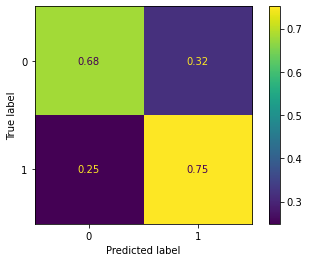

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
y_pred = clf.fit(x_train, y_train).predict(x_test)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test, normalize='true')

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.7161752824614984

#Save Model:

In [14]:
import joblib

In [ ]:
RF_path='/content/drive/MyDrive/MachineLearning/NLP/RF_model.pkl'
joblib.dump(clf,RF_path)



['/content/drive/MyDrive/MachineLearning/NLP/RF_model.pkl']

For loading:

In [15]:
RF_path='/content/drive/MyDrive/MachineLearning/NLP/RF_model.pkl' 
RF_CLF=joblib.load(RF_path)

In [ ]:

y_pred = RF_CLF.predict(x_test)



In [18]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred, normalize='true')

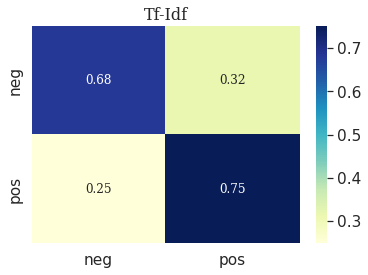

In [46]:
ax = plt.axes()
font={"size": 16, "family":'serif'}
ax.set_title('Tf-Idf',fontdict=font)

sn.set(font_scale=1.4)
ax=sn.heatmap(cm, annot=True, fmt='2.2f',
            yticklabels=[ 'neg','pos'] ,
           xticklabels=[ 'neg','pos'] ,
           cmap='YlGnBu',ax=ax
           ,annot_kws={"size": 12, "family":'serif'}, 
           );